In [1]:
import openturns as ot
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from shapley import SobolIndices, SobolKrigingIndices
from shapley.tests import Ishigami
from shapley.tests.test_functions import AdditiveGaussian
from shapley.plots import set_style_paper, plot_sensitivity_results

%load_ext autoreload
%autoreload 2

%matplotlib inline

set_style_paper()

savefigs = False
ylim = [0., 1.]

## The Model

In [2]:
dim = 3
beta = [1., 1., 1.]
gaussian = AdditiveGaussian(dim=dim, beta=beta)
model = gaussian

theta_12 = -0.5
theta_13 = 0.2
theta_23 = -0.7
sigma = np.identity(dim)
sigma[1, 0] = theta_12
sigma[0, 1] = theta_12
sigma[2, 0] = theta_13
sigma[0, 2] = theta_13
sigma[2, 1] = theta_23
sigma[1, 2] = theta_23

copula = ot.NormalCopula(ot.CorrelationMatrix(sigma))
model.copula = copula

In [3]:
ot.RandomGenerator.SetSeed(0)
np.random.seed(0)

n_sample = 10000

# Evaluate the model
sobol = SobolIndices(model.input_distribution)
sobol.build_uncorrelated_mc_sample(model, n_sample)

In [4]:
n_boot = 500
estimator = 'soboleff2'
sobol_results_full = sobol.compute_full_indices(n_boot=n_boot, estimator=estimator)
sobol_results_ind = sobol.compute_ind_indices(n_boot=n_boot, estimator=estimator)

# Results
first_indices_full_mc = sobol_results_full.first_indices
total_indices_full_mc = sobol_results_full.total_indices
first_indices_ind_mc = sobol_results_ind.first_indices
total_indices_ind_mc = sobol_results_ind.total_indices

print("Full Sobol indices:", first_indices_full_mc)
print("Full Total Sobol indices:", first_indices_full_mc)
print("Ind Sobol indices:", first_indices_ind_mc)
print("Ind Total Sobol indices:", first_indices_ind_mc)

Full Sobol indices: [ 0.4840229   0.04327511  0.23325224]
Full Total Sobol indices: [ 0.4840229   0.04327511  0.23325224]
Ind Sobol indices: [ 0.70299408  0.36924913  0.48420896]
Ind Total Sobol indices: [ 0.70299408  0.36924913  0.48420896]


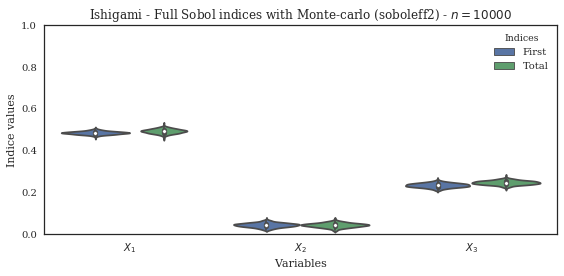

In [5]:
fig, ax = plt.subplots(figsize=(8, 4))
plot_sensitivity_results(sobol_results_full, ax=ax)
ax.set_title("Ishigami - Full Sobol indices with Monte-carlo (%s) - $n=%d$" % (estimator, n_sample))
ax.set_ylim(ylim)
fig.tight_layout()
if savefigs:
    fig.savefig('./output/ishigami_sobol_MC.pdf')

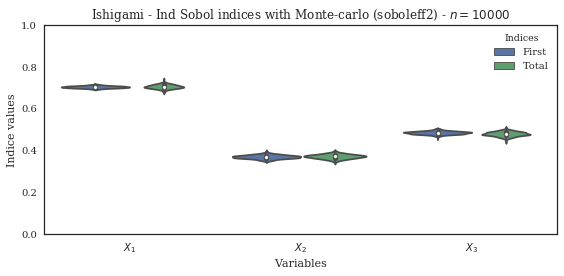

In [6]:
fig, ax = plt.subplots(figsize=(8, 4))
plot_sensitivity_results(sobol_results_ind, ax=ax)
ax.set_title("Ishigami - Ind Sobol indices with Monte-carlo (%s) - $n=%d$" % (estimator, n_sample))
ax.set_ylim(ylim)
fig.tight_layout()
if savefigs:
    fig.savefig('./output/ishigami_sobol_MC.pdf')